In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [53]:
import os

path = os.listdir("C:/Users/nites/Downloads/archive/Training")
classes = {'no_tumor':0, 'pituitary_tumor':1}


In [54]:
import cv2
X = []
Y = []
for cls in classes:
    pth = "C:/Users/nites/Downloads/archive/Training/"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (150,150))
        X.append(img)
        Y.append(classes[cls])


In [55]:
X = np.array(X)
Y = np.array(Y)

In [56]:
np.unique(Y)



array([0, 1])

In [57]:
pd.Series(Y).value_counts()


1    827
0    395
dtype: int64

In [58]:
X.shape


(1222, 150, 150)

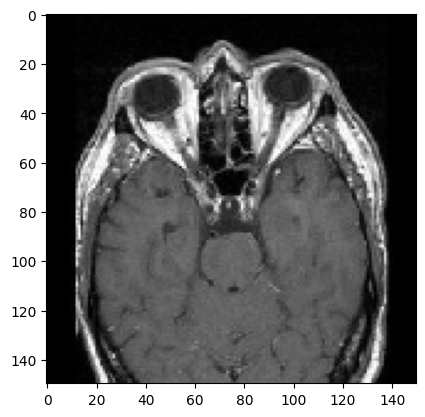

In [59]:
plt.imshow(X[0], cmap='gray')


In [60]:

X_updated = X.reshape(len(X), -1)
X_updated.shape



(1222, 22500)

In [61]:

xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)



In [62]:

xtrain.shape, xtest.shape


((977, 22500), (245, 22500))

In [63]:

print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [64]:
from sklearn.decomposition import PCA


In [65]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)

pca_train = xtrain
pca_test = xtest


(977, 22500) (245, 22500)


In [66]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [67]:

import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1)

In [68]:
sv = SVC()
sv.fit(pca_train, ytrain)



SVC()

In [69]:

print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))


Training Score: 1.0
Testing Score: 0.9591836734693877


In [70]:

print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))


Training Score: 0.9928352098259979
Testing Score: 0.963265306122449


In [71]:

pred = sv.predict(pca_test)
np.where(ytest!=pred)


(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [72]:

pred[36]



0

In [73]:

ytest[36]



1

In [74]:
dec = {0:'No Tumor', 1:'Positive Tumor'}



ValueError: X has 40000 features, but SVC is expecting 22500 features as input.

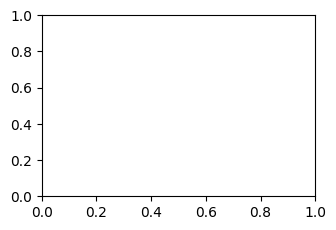

In [75]:

plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/nites/Downloads/archive/Testing/')
c=1
for i in os.listdir('C:/Users/nites/Downloads/archive/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/nites/Downloads/archive/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/nites/Downloads/archive/Testing/')
c=1
for i in os.listdir('C:/Users/nites/Downloads/archive/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/nites/Downloads/archive/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1